In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import pca, align
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import sys, math
from timeit import default_timer as timer 
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from matplotlib.font_manager import FontProperties

from matplotlib import rc
%matplotlib inline

#provide path to the trajectory and prmtop file
top='/media/rutika/My Book/prabir_paper/3LZ0/dry_.3lz0-2M-OPC-trial3.prmtop'
traj='/media/rutika/My Book/prabir_paper/3LZ0/3lz0_combined.dcd'
u = mda.Universe(top,traj)

/home/rutika/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [2]:
#provide tail residues resid that are required for PCA
pc = pca.PCA(u, select='resid 291-332 and backbone',
             align=True, mean=None,
             n_components=None).run()

In [3]:
backbone = u.select_atoms('resid 291-332 and backbone')
transformed = pc.transform(backbone, n_components=2)
transformed.shape

(50000, 2)

In [4]:
df = pd.DataFrame(transformed,
                  columns=['PC{}'.format(i+1) for i in range(2)])
df['Time (ps)'] = df.index * u.trajectory.dt
df.head()

,PC1,PC2,Time (ps)
0,8.829022,-37.931314,0.000000
1,15.629840,-45.057127,0.000049
2,20.972209,-49.911637,0.000098
3,26.362716,-46.963904,0.000147
4,23.093116,-54.371781,0.000196


In [5]:
#save the .csv file of the PC1 and PC2 
df_list = np.array(df)
a1 = pd.DataFrame(df_list)
a1.to_csv("3lz0_H3_1_PC.csv")

In [6]:
A1=pd.read_csv('3lz0_H3_1_PC.csv')
A1

,Unnamed: 0,0,1,2
0,0,8.829022,-37.931314,0.000000
1,1,15.629840,-45.057127,0.000049
2,2,20.972209,-49.911637,0.000098
3,3,26.362716,-46.963904,0.000147
4,4,23.093116,-54.371781,0.000196
...,...,...,...,...
49995,49995,-60.289287,-88.099403,2.444166
49996,49996,-66.104030,-86.049049,2.444215
49997,49997,-64.737694,-85.741589,2.444264
49998,49998,-68.210083,-79.706436,2.444313


In [7]:
#provide names to the columns 
data = pd.read_csv("3lz0_H3_1_PC.csv",names=['frame','pc1','pc2','ps'],header=0) #to give names to the .csv columns
data

,frame,pc1,pc2,ps
0,0,8.829022,-37.931314,0.000000
1,1,15.629840,-45.057127,0.000049
2,2,20.972209,-49.911637,0.000098
3,3,26.362716,-46.963904,0.000147
4,4,23.093116,-54.371781,0.000196
...,...,...,...,...
49995,49995,-60.289287,-88.099403,2.444166
49996,49996,-66.104030,-86.049049,2.444215
49997,49997,-64.737694,-85.741589,2.444264
49998,49998,-68.210083,-79.706436,2.444313


In [164]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from matplotlib.font_manager import FontProperties
from matplotlib import rc
from scipy.ndimage.filters import gaussian_filter

def cal_2d(x,y,temp,R,pmf_max):
    H, xedges, yedges = np.histogram2d(x,y,density=True,bins=(30,30),range=([-150,30],[-150,30]))
    stepx = xedges[1]-xedges[0]
    stepy = yedges[1]-yedges[0]
    xx, yy = np.mgrid[xedges.min():xedges.max():stepx,yedges.min():yedges.max():stepy]
    pos = np.dstack((xx, yy))
    pmax = 0
    for i in H:
        p = i.sum()
        if p >=pmax:
            pmax = p
    print("Found pmax = ",pmax)
    # print(" xedges, yedges, H = ",(H, xedges, yedges))

    for i in range(len(H)):
        for j in range(len(H.T)):
            if H[i,j]!=0:
                H[i,j]=-R*temp*np.log(H[i,j]/pmax)
            else:
                H[i,j]=pmf_max
    # print(pos,H)
    return pos,H

/tmp/ipykernel_393336/2752112511.py:8: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [165]:
data = pd.read_csv("3lz0_H3_1_PC.csv",names=['frame','pc1','pc2','ps'],header=0)
pos,H=cal_2d(data['pc1'],data['pc2'],310,0.001987,6.0)

Found pmax =  0.00414471783245538


In [166]:
pos,H

(array([[[-150., -150.],
         [-150., -144.],
         [-150., -138.],
         ...,
         [-150.,   12.],
         [-150.,   18.],
         [-150.,   24.]],
 
        [[-144., -150.],
         [-144., -144.],
         [-144., -138.],
         ...,
         [-144.,   12.],
         [-144.,   18.],
         [-144.,   24.]],
 
        [[-138., -150.],
         [-138., -144.],
         [-138., -138.],
         ...,
         [-138.,   12.],
         [-138.,   18.],
         [-138.,   24.]],
 
        ...,
 
        [[  12., -150.],
         [  12., -144.],
         [  12., -138.],
         ...,
         [  12.,   12.],
         [  12.,   18.],
         [  12.,   24.]],
 
        [[  18., -150.],
         [  18., -144.],
         [  18., -138.],
         ...,
         [  18.,   12.],
         [  18.,   18.],
         [  18.,   24.]],
 
        [[  24., -150.],
         [  24., -144.],
         [  24., -138.],
         ...,
         [  24.,   12.],
         [  24.,   18.],
         [ 

In [167]:
smoothing_factor = 0.6
H = gaussian_filter(H,smoothing_factor)

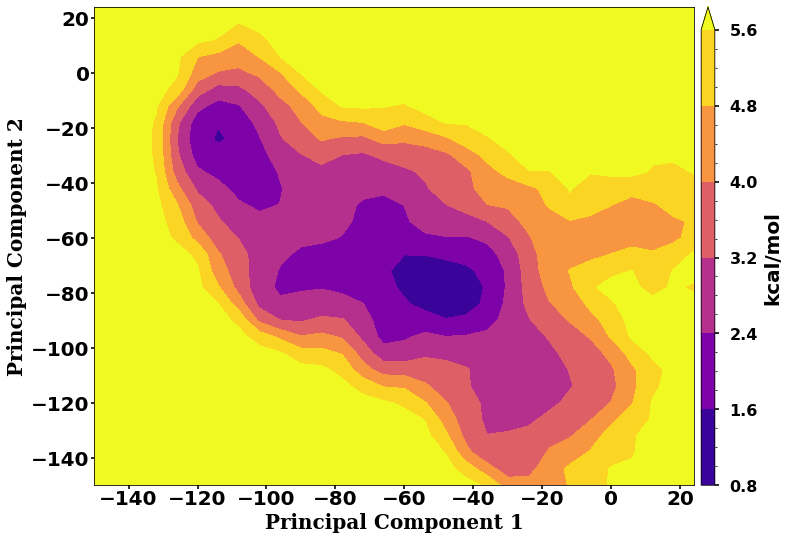

In [169]:
plt.style.use('seaborn-poster')
plot = plt.contourf(pos[:,:,0],pos[:,:,1],H,extend='max',cmap='plasma')
font1 = {'family': 'serif', 'size': 20, 'color': 'black'}

plt.xlabel("Principal Component 1", fontdict=font1, weight='bold',fontsize=20)
plt.ylabel("Principal Component 2", fontdict=font1, weight='bold',fontsize=20)
plt.tick_params(labelsize=20, pad=1)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

cbar = plt.colorbar(plot, pad = 0.01, aspect = 35)
cbar.set_label('kcal/mol',rotation=90,labelpad=5, fontsize = 20)
cbar.minorticks_on()

plt.savefig('3lz0_H3_1_PCA.svg', format="svg",transparent=True, dpi = 600)  
plt.show()

In [63]:
import pandas as pd
import MDAnalysis as mda

In [170]:
def find_peak(data,c1,c2,min_c1,max_c1,min_c2,max_c2):

    bool_c1_max = data[c1] <= max_c1
    bool_c1_min = data[c1] >= min_c1

    bool_c2_max = data[c2] <= max_c2
    bool_c2_min = data[c2] >= min_c2

    frame = data.loc[bool_c1_min & bool_c1_max & bool_c2_min & bool_c2_max]['F']

    #print(frame)
    frames = frame.values
    #print(frames)
    nf = +len(frames)


    return frames

In [173]:
df = pd.read_csv("3lz0_H3_1_PC.csv")


print("Be careful with negative values for min/max!")
#peak = str(input("Peak name: "))
c1 = "PC1"
min_c1 = -150
max_c1 = -100

c2 = "PC2"
min_c2 = -50
max_c2 = 0

frames = find_peak(df,c1,c2,min_c1,max_c1,min_c2,max_c2)

i=1
while len(frames)>7:
    delta_x=1
    frames = find_peak(df,c1,c2,min_c1+delta_x*i,max_c1-delta_x*i,min_c2+delta_x*i,max_c2-delta_x*i)
    print(len(frames))
    i=i+1
    
for i in range(len(frames)):
    print(frames[i])


nf = +len(frames)

print("There are %s to write." % nf)

print("Using MDAnalysis version", mda.__version__)

Be careful with negative values for min/max!
7844
7442
7017
6578
6114
5613
5064
4489
3947
3459
2998
2584
2125
1741
1349
1036
684
399
214
101
54
23
6
12373
12395
12410
12414
12441
12979
There are 6 to write.
Using MDAnalysis version 2.4.3


In [174]:
PRMTOP="/media/rutika/My Book/prabir_paper/3LZ0/dry_.3lz0-2M-OPC-trial3.prmtop"
DCD="/media/rutika/My Book/prabir_paper/3LZ0/3lz0_combined.dcd"
u = mda.Universe(PRMTOP,DCD)
selected_Atoms = u.select_atoms('all')
with mda.Writer("3lz0_pca_combined_A.dcd",selected_Atoms.n_atoms) as W:
    for ts in u.trajectory[::1]:
        current = ts.frame
        for i in frames:
            if current == i:
                W.write(selected_Atoms)

/home/rutika/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [215]:
df = pd.read_csv("3lz0_H3_1_PC.csv")


print("Be careful with negative values for min/max!")
#peak = str(input("Peak name: "))
c1 = "PC1"
min_c1 = -59
max_c1 = -50

c2 = "PC2"
min_c2 = -90
max_c2 = -81

frames = find_peak(df,c1,c2,min_c1,max_c1,min_c2,max_c2)

i=1
while len(frames)>9:
    delta_x=1
    frames = find_peak(df,c1,c2,min_c1+delta_x*i,max_c1-delta_x*i,min_c2+delta_x*i,max_c2-delta_x*i)
    print(len(frames))
    i=i+1
    
for i in range(len(frames)):
    print(frames[i])


nf = +len(frames)

print("There are %s to write." % nf)

print("Using MDAnalysis version", mda.__version__)

Be careful with negative values for min/max!
368
160
61
8
2295
22830
24250
26563
39868
48084
49892
49940
There are 8 to write.
Using MDAnalysis version 2.4.3


In [216]:
PRMTOP="/media/rutika/My Book/prabir_paper/3LZ0/dry_.3lz0-2M-OPC-trial3.prmtop"
DCD="/media/rutika/My Book/prabir_paper/3LZ0/3lz0_combined.dcd"
u = mda.Universe(PRMTOP,DCD)
selected_Atoms = u.select_atoms('all')
with mda.Writer("3lz0_pca_combined_B.dcd",selected_Atoms.n_atoms) as W:
    for ts in u.trajectory[::1]:
        current = ts.frame
        for i in frames:
            if current == i:
                W.write(selected_Atoms)

/home/rutika/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
